In [1]:
import sys
sys.path.append('..')

from baselines.gnn.trainer import Trainer

/home/kamil/Desktop/git/meteoapp-data/venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


In [2]:
# batch_size = 4 worse val_loss better rmse and other metrics ?
# batch_size = 32 better val_loss worse rmse and other metrics ?
# why ???

In [ ]:
trainer = Trainer(architecture='cgcn', hidden_dim=32, lr=1e-3)
trainer.train(num_epochs=1000)

In [ ]:
# Fatsest val_loss to 2.3k competition

# Adam, spatial
# Epoch 25/1000, Train Loss: 2320.2722, lr: 0.001
# Val Loss: 2297.6578

# AdamW + clip, spatial
# Epoch 50/1000, Train Loss: 2366.5738, lr: 0.001
# Val Loss: 2337.7717
# ---------
# [Callback] Adjusting lr. Counter: 7
# Epoch 51/1000, Train Loss: 2308.8480, lr: 0.0005
# Val Loss: 2277.9822
# ---------

# Adam, no-spatial
# Epoch 24/1000, Train Loss: 2293.5397, lr: 0.001
# Val Loss: 2299.2925

# AdamW + clip, no-spatial
# Epoch 41/1000, Train Loss: 2364.4379, lr: 0.001
# Val Loss: 2325.0777
# ---------
# [Callback] Adjusting lr. Counter: 7
# Epoch 42/1000, Train Loss: 2309.2647, lr: 0.0005
# Val Loss: 2281.5446


# Epoch 79/100, Train Loss: 1947.0170, lr: 3.125e-05
# Val Loss: 2902.4017

# Epoch 75/100, Train Loss: 2012.7286, lr: 1.5625e-05
# Val Loss: 2748.1604

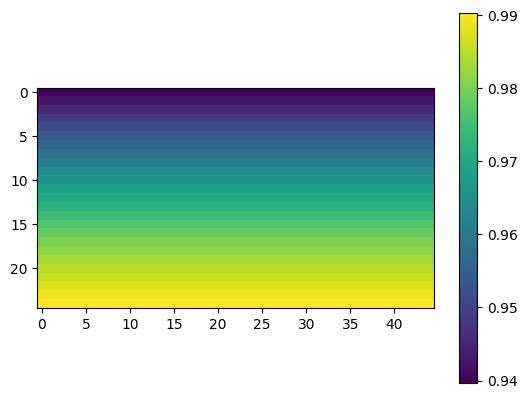

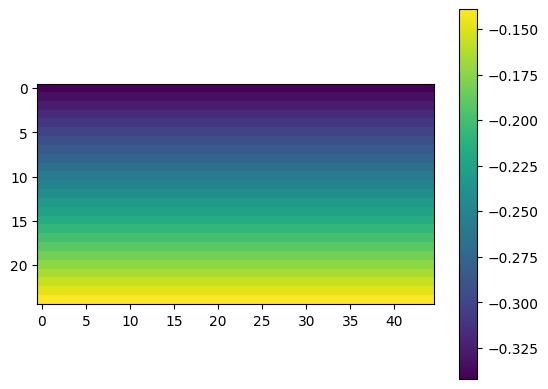

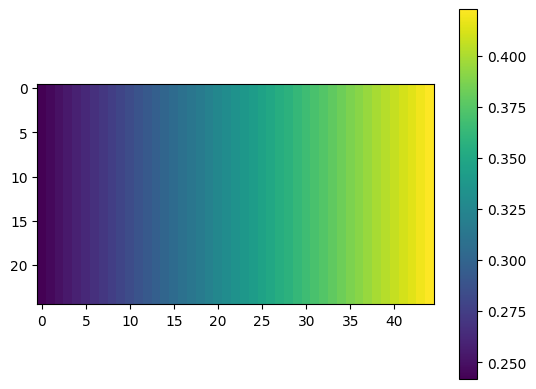

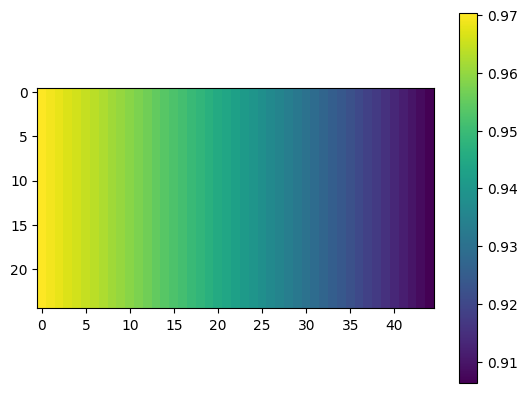

In [11]:
import matplotlib.pyplot as plt

sample = next(iter(trainer.train_loader)).x
sample = sample.reshape(4, 25, 45, 10, 3)
for i in range(4):
    plt.imshow(sample[0,...,6+i,0].cpu())
    plt.colorbar()
    plt.show()

In [ ]:
trainer.evaluate("train")

In [ ]:
trainer.evaluate("test")

# [CGCN]

### Full training:

N = 5; hidden = 32; batch=4 TEST SET:
 
RMSE for f0: 2.2464043976548047; MAE for f0: 1.6999678436793948;

RMSE for f1: 1.9364765893388307; MAE for f1: 1.408220916940946;

RMSE for f2: 0.28386787466464225; MAE for f2: 0.21952327282997064;

RMSE for f3: 1.411270602820433; MAE for f3: 1.0502013356032074;

RMSE for f4: 1.412410520285922; MAE for f4: 1.0404767270553594;

RMSE for f5: 0.0002722878701922671; MAE for f5: 0.0001054861260521275;

------------------------------------------------------------------------

N = 5; hidden = 64; batch=4; no significant difference TEST SET:

RMSE for f0: 2.205407197194004; MAE for f0: 1.6519353043910658;

RMSE for f1: 2.029980887836009; MAE for f1: 1.4714761668475365;

RMSE for f2: 0.28731255755261337; MAE for f2: 0.22192368753909236;

RMSE for f3: 1.4478491874482888; MAE for f3: 1.0733782789693203;

RMSE for f4: 1.4493260989133352; MAE for f4: 1.058615083231145;

RMSE for f5: 0.0002749573712955729; MAE for f5: 0.00010411299434883103;

------------------------------------------------------------------------

With bigger batch_size training is more stable (almost no overfitting) but it does not improve performance

------------------------------------------------------------------------

N = 10; hidden = 32; batch=32; no significant difference, much longer training; even worse performance

------------------------------------------------------------------------

N = 10; hidden = 32; batch=32; mlp - 3 layers for encoder and decoder each - totally failed to learn sufficient representation; loss after 100 epochs is 2x bigger

------------------------------------------------------------------------

With gradient clip=100; h=32; b=32; n=5 -> loss plot is more smooth

RMSE for t2m: 2.3807000767333983; MAE for t2m: 1.8284217557244822;

RMSE for tcc: 2.2638646906319004; MAE for tcc: 1.6580551376662336;

RMSE for u10: 0.28466073801596425; MAE for u10: 0.22292598680924447;

RMSE for v10: 1.4152165344262562; MAE for v10: 1.056918092717271;

RMSE for tp: 1.4210972798532857; MAE for tp: 1.0426973776264234;

RMSE for sp: 0.0002774151951318293; MAE for sp: 0.00010699005800520397;

------------------------------------------------------------------------

Using learning constants advised by authors of graphcast does not improve performance (it is actually worse) but training is super stable - no overfittin at all:
clip=32; self.optimizer = torch.optim.AdamW(self.model.parameters(), betas=(0.9, 0.95), weight_decay=0.1); h=32; b=32

RMSE for t2m: 2.6790109251385346; MAE for t2m: 2.064865770450839;

RMSE for tcc: 2.2133519471112115; MAE for tcc: 1.6241865286434534;

RMSE for u10: 0.2823515758338797; MAE for u10: 0.22227485714086204;

RMSE for v10: 1.4398015960157504; MAE for v10: 1.0776576370734994;

RMSE for tp: 1.459266796233724; MAE for tp: 1.0795614604177897;

RMSE for sp: 0.00026684837551226877; MAE for sp: 0.00011326350266132657;


------------------------------------------------------------------------
Test AdamW for subset 30:



Epoch 300/300, Train Loss: 2126.0813, lr: 0.0005
Val Loss: 2170.4064

RMSE for t2m: 2.542392155132118; MAE for t2m: 1.9760580701717938;

RMSE for tcc: 2.2345008124975436; MAE for tcc: 1.641610119153863;

RMSE for u10: 0.2798438730903883; MAE for u10: 0.22311758102642487;

RMSE for v10: 1.4142314190690894; MAE for v10: 1.0572955320246566;

RMSE for tp: 1.4419994581694888; MAE for tp: 1.0626909864744751;

RMSE for sp: 0.00026517082409864415; MAE for sp: 0.00011171030055055118;


<br>

Epoch 111/300, Train Loss: 1892.6492, lr: 1.953125e-05
Val Loss: 2278.2073

Regular Adam overfits faster!

RMSE for t2m: 2.462725161219301; MAE for t2m: 1.8802260621920581;

RMSE for tcc: 2.050671564700832; MAE for tcc: 1.496878075945819;

RMSE for u10: 0.29108879830409606; MAE for u10: 0.22735035309318213;

RMSE for v10: 1.45013345457189; MAE for v10: 1.0824693106168237;

RMSE for tp: 1.4534132896562777; MAE for tp: 1.0730399367480314;

RMSE for sp: 0.00026861947818754685; MAE for sp: 0.00010743896842065517;

------------------------------------------------------------------------

32 batch_size

Test AdamW for 650 epochs

epoch 450 -> 630: val_loss 2156 -> 2154.35 ... veeery slow

Epoch 635/3000, Train Loss: 2007.6319, lr: 6.25e-05
Val Loss: 2154.3627

RMSE for t2m: 2.374920093281214; MAE for t2m: 1.825446942889366;

RMSE for tcc: 1.934781080630695; MAE for tcc: 1.440275953202643;

RMSE for u10: 0.27891942856927693; MAE for u10: 0.21959464355241812;

RMSE for v10: 1.4032331119908186; MAE for v10: 1.0472651794472845;

RMSE for tp: 1.4270852073400706; MAE for tp: 1.0514319534209646;

RMSE for sp: 0.00026807549549976584; MAE for sp: 0.00010374101359034243;

And retrain for another ~100 epochs starting with lr=0.001

Epoch 117/3000, Train Loss: 1996.2265, lr: 4.8828125e-07
Val Loss: 2147.5976

RMSE for t2m: 2.362443101215429; MAE for t2m: 1.8129088702135565;

RMSE for tcc: 1.9058418101131351; MAE for tcc: 1.4109735495544298;

RMSE for u10: 0.278758591001822; MAE for u10: 0.21784827063459586;

RMSE for v10: 1.4033993603293886; MAE for v10: 1.0458335290530631;

RMSE for tp: 1.4286469497076204; MAE for tp: 1.0510217919543199;

RMSE for sp: 0.00026647597382923086; MAE for sp: 0.00010325525085403092;


Retrain for another ~200epoch with batch_size=4; start with lr=0.01
Epoch 217/3000, Train Loss: 2147.8535, lr: 7.8125e-05
Val Loss: 2165.5707

RMSE for t2m: 2.2909087951225993; MAE for t2m: 1.7465725081254844;

RMSE for tcc: 1.9833718048738613; MAE for tcc: 1.4148737335402626;

RMSE for u10: 0.2820898910703319; MAE for u10: 0.21638233899559758;

RMSE for v10: 1.4179210015176462; MAE for v10: 1.0595987630294779;

RMSE for tp: 1.4344424007598335; MAE for tp: 1.0635660365221824;

RMSE for sp: 0.00026667937622278033; MAE for sp: 0.00011324805656348794;

------------------------------------------------------------------------

AdamW; batch_size=4

Loss still goes down but veeery slowly, super stable though, no overfitting at all
Epoch 418/3000, Train Loss: 2167.8868, lr: 3.125e-05
Val Loss: 2169.5276

RMSE for t2m: 2.478773593165839; MAE for t2m: 1.9161613328296017;

RMSE for tcc: 1.9557973406183256; MAE for tcc: 1.435367676933997;

RMSE for u10: 0.27970377140309594; MAE for u10: 0.222125477575149;

RMSE for v10: 1.4170224306825128; MAE for v10: 1.056216633587702;

RMSE for tp: 1.4330866463290028; MAE for tp: 1.0559691220468526;

RMSE for sp: 0.0002639260373372121; MAE for sp: 0.00010320724673989641;